---
# Lecture notes - k-means clustering
---

This is the lecture note for **k-means** clustering.

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to k-means clustering. I encourage you to read further about k-means. </p>

Read more:

- [Unsupervised learning - wikipedia](https://en.wikipedia.org/wiki/Unsupervised_learning)
- [Cluster analysis - wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)
- [k-means clustering - wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)
- [Color quantization - wikipedia](https://en.wikipedia.org/wiki/Color_quantization)
- [Clustering user guide - sklearn](https://scikit-learn.org/stable/modules/clustering.html#k-means)
- [KMeans - sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- [Find optimal k clusters - analyticsvidhya](https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/)
- [Silhouette (clustering) - wikipedia](https://en.wikipedia.org/wiki/Silhouette_(clustering))
- [ISLRv2 - pp. 516-521](https://www.statlearning.com/)
---


In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X, y = make_blobs(500, centers=4, random_state=42, cluster_std=1)

X, y

(array([[ -7.68905443,   6.62034649],
        [ -9.57651383,  -6.93440446],
        [  6.82968177,   1.1648714 ],
        [ -2.90130578,   7.55077118],
        [ -5.67841327,  -7.28818497],
        [ -6.04929137,  -7.73619342],
        [ -6.27824322,   7.22746302],
        [ -6.60917037,  -6.9303477 ],
        [  3.57225841,   1.8307902 ],
        [ -7.50444577,  -6.85401854],
        [  3.99330595,   0.89162168],
        [ -1.35060204,   8.19360381],
        [  6.77291221,   0.02108188],
        [ -1.93830711,  10.14985177],
        [ -6.58985233,  -4.80470879],
        [  5.69830332,   0.2144302 ],
        [ -2.58120774,  10.01781903],
        [ -9.96104978,   7.70593266],
        [ -8.75604377,   8.38900329],
        [ -3.6155326 ,   7.8180795 ],
        [  3.24131126,   2.53613892],
        [ -2.30033403,   7.054616  ],
        [  5.2164358 ,   2.28441984],
        [ -7.27280373,   7.25777265],
        [ -9.28476137,   7.51761291],
        [ -6.48517505,  -7.30109407],
        [ -7

In [2]:
# , columns = ["x1", "x2", "label"])
df = pd.DataFrame([X[:, 0], X[:, 1], y]).T

df.columns = ["x1", "x2", "label"]
df["label"] = df.label.astype(int) # pandas makes it a float for some reason

df.head()

,x1,x2,label
0,-7.689054,6.620346,3
1,-9.576514,-6.934404,2
2,6.829682,1.164871,1
3,-2.901306,7.550771,0
4,-5.678413,-7.288185,2


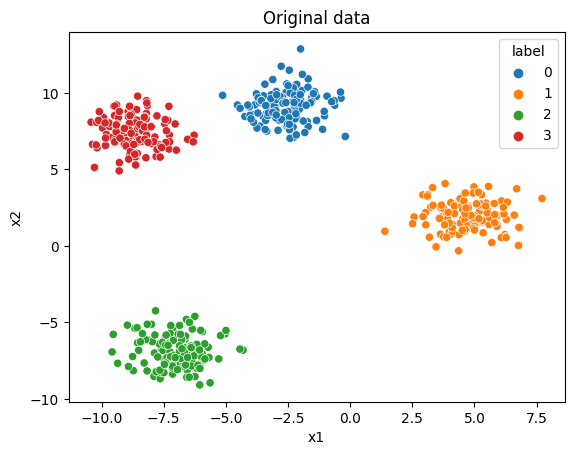

In [3]:
sns.scatterplot(data=df, x="x1", y="x2", hue="label", palette="tab10")
plt.title("Original data");

In [4]:
# we don't have labels in unsupervised learning
# in this simulation we drop the label, but for real world data there is no label in beginning
X = df.drop("label", axis = 1)
X.head()

,x1,x2
0,-7.689054,6.620346
1,-9.576514,-6.934404
2,6.829682,1.164871
3,-2.901306,7.550771
4,-5.678413,-7.288185


---
## Feature scaling

- need to scale dataset with either feature standardization or normalization
- in unsupervised, as there is no label, we can use the whole dataset in scaling
- we don't divide into training and test dataset, instead we use the whole dataset

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X[:5]

array([[-0.81539333,  0.58938951],
       [-1.17344434, -1.55328827],
       [ 1.93881064, -0.27298895],
       [ 0.0928425 ,  0.73646712],
       [-0.43397474, -1.60921239]])

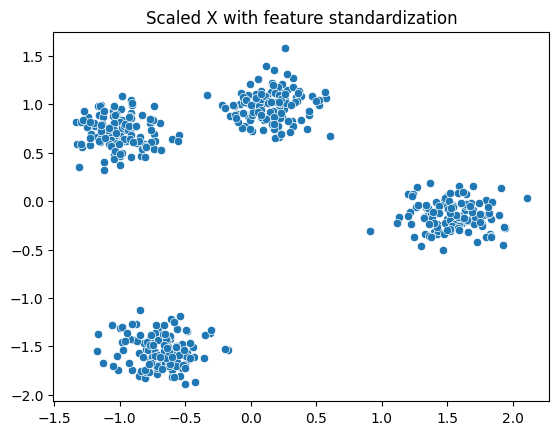

In [6]:
sns.scatterplot(x=scaled_X[:, 0], y=scaled_X[:, 1])
plt.title("Scaled X with feature standardization");

---
## k-means clustering

- k-means clustering is an unsupervised learning algorithm, which means that there are no labels

1. $k$ number of clusters are chosen
2. $k$ points are randomly selected as cluster centers
3. the nearest points to each cluster center are classified as that cluster
4. the center of the cluster is recalculated
5. repeat 3 and 4 until convergence

note that nearest points are defined by some distance metric

### Choose k

- plot an elbow plot of sum of squared distances (inertia in sklearn) and find the an inflexion point to choose $k$, i.e. the point with significant lower rate of change than before (note that this might be hard to find exact)
- domain skills, it's important to understand your dataset to find an adequate $k$ and also equally important to be able to know what the clusters represent
- note that it is hard to find correct number of clusters, and it is here the art and domain skills become more important


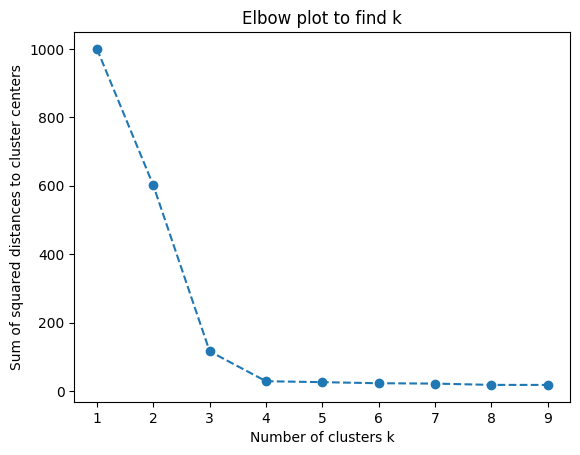

In [7]:
from sklearn.cluster import KMeans

clusters = range(1, 10)
sum_squared_distances = [KMeans(k, n_init = "auto").fit(scaled_X).inertia_ for k in clusters]

fig, ax = plt.figure(), plt.axes()
ax.plot(clusters, sum_squared_distances, '--o')
ax.set(title="Elbow plot to find k", xlabel="Number of clusters k",
       ylabel="Sum of squared distances to cluster centers");

# note here that it is very hard to pick 3 or 4 clusters as the clusters are close to each other 

In [8]:
SSD_differences = pd.Series(sum_squared_distances).diff()[1:]
# SSD_differences.index = clusters[:-1]
SSD_differences

1   -398.734497
2   -485.169824
3    -87.308740
4     -2.726723
5     -3.162301
6     -0.998399
7     -3.844428
8     -0.068064
dtype: float64

---
## Silhouette score 

Note that it's usually not possible to plot the clusters, instead the silhouette score in combination with elbow plot can help in determining clusters. 

- silhouette score is a measure of cluster tightness

The silhoutte coefficient $S_i$ is calculated as 
$$S_i = \frac{b_i-a_i}{\max{\{a_i, b_i\}}}$$
,where 
- $a_i$ is mean distance between i and other points in the cluster it belongs to
- $b_i$ is the mean distance from i to clusters it doesn't belong to

Calculate average silhouette score for different $k$ clusters in the clustering algorithm, in this case KMeans. 

- silhouette coefficient is between -1 and 1
- value 1 -> very compact clusters
- value 0 -> overlapping clusters
- value -1 -> worst value

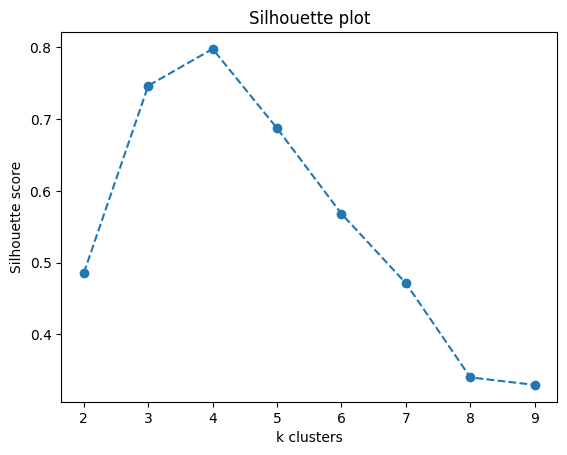

In [9]:
from sklearn.metrics import silhouette_score

fig, ax = plt.figure(), plt.axes()

kmeans = [KMeans(k, n_init = "auto", random_state=42).fit(scaled_X) for k in clusters]
silhouette_list = [silhouette_score(scaled_X, kmean.labels_) for kmean in kmeans[1:]]

ax.plot(clusters[1:], silhouette_list, "--o")
ax.set(title = "Silhouette plot", xlabel = "k clusters", ylabel = "Silhouette score");

---
### Visualization

- note that we don't have the luxury to visualize real world data as dimensions usually are much higher than 2

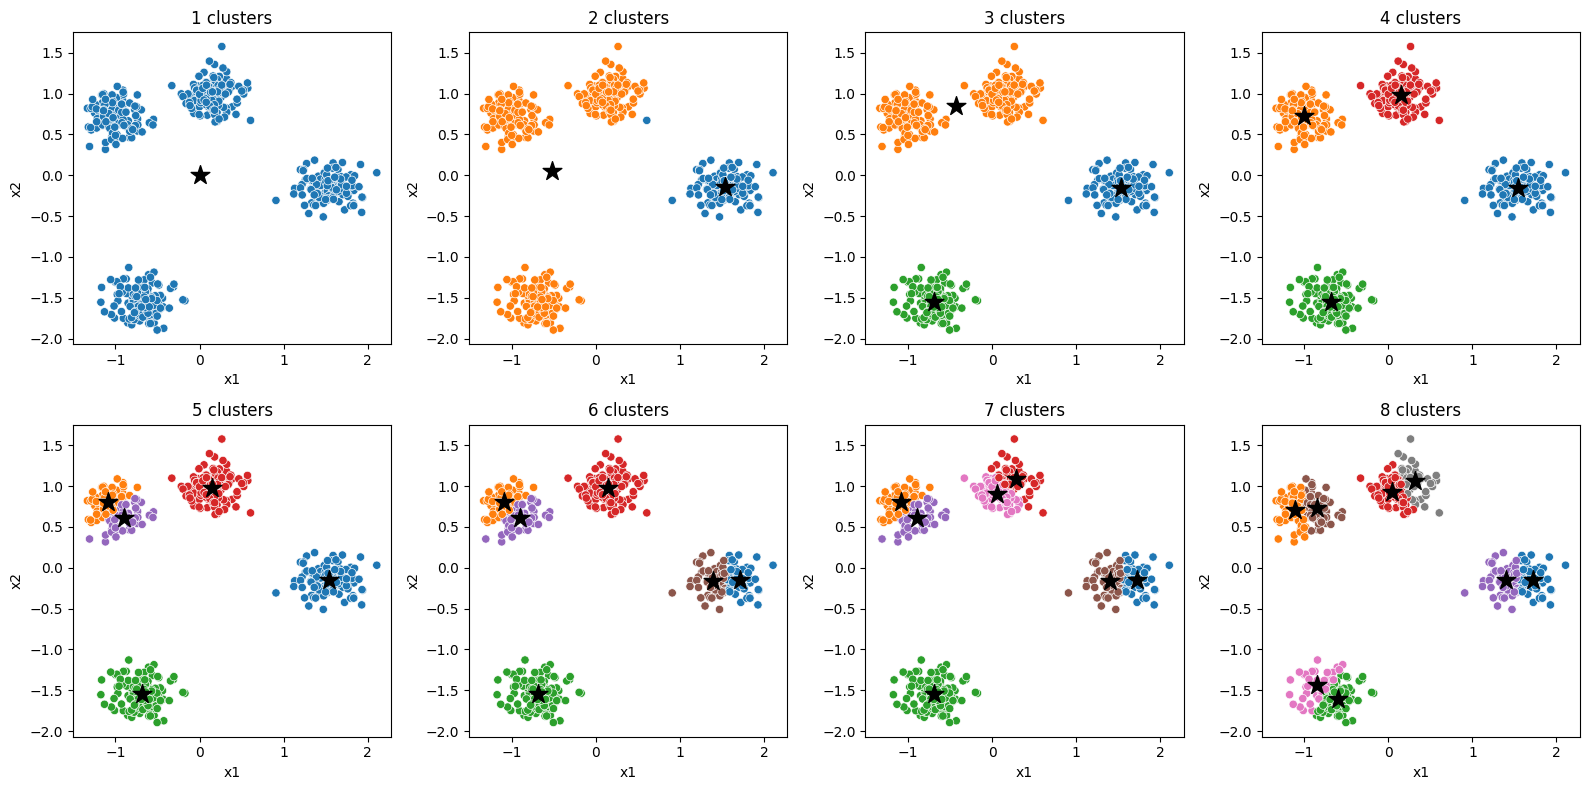

In [10]:
df_plot = pd.DataFrame(scaled_X, columns=["x1", "x2"])

number_plots = round(len(clusters)/2)

fig, axes = plt.subplots(2, number_plots, figsize=(16, 8))

for i, ax in enumerate(axes.flatten()):
    cluster_centers = kmeans[i].cluster_centers_
    df_plot["label"] = kmeans[i].labels_

    sns.scatterplot(data=df_plot, x="x1", y="x2",
                    hue="label", ax=ax, palette="tab10")

    ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s = 200,
            marker = '*', color="black", label="centroid")
    ax.legend([],[], frameon = False)
    ax.set(title = f"{i+1} clusters")

plt.tight_layout()


---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---
